In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv(r"C:\Users\Edbert Chandradinata\Downloads\heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DATA PREPARATION & CLEANING

In [4]:
# // check missing values
df.isnull().sum()
print(df.isnull().sum())
print(df.columns)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


## EDA

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

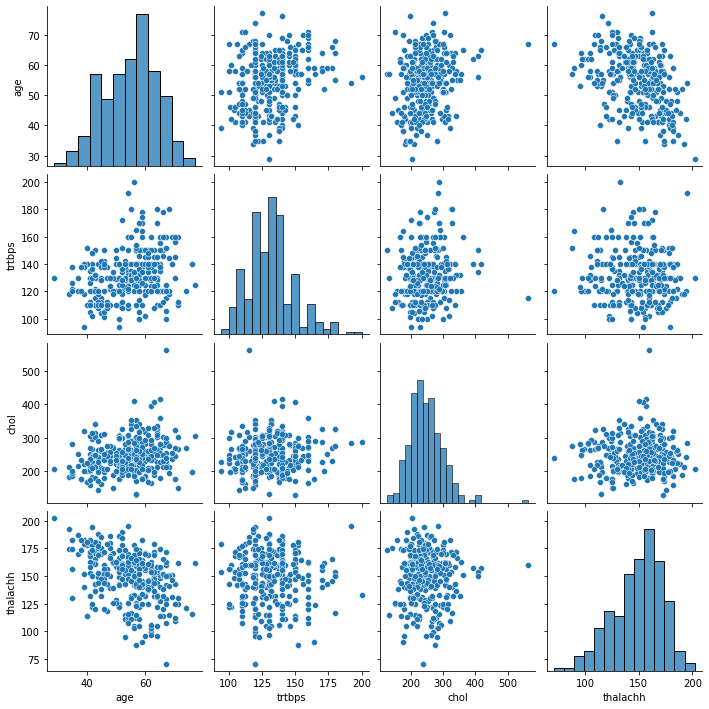

In [5]:
# Exploranatory Data Analysis
# EDA
print(df.describe())
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh']])
plt.show()

## Compare two different variable

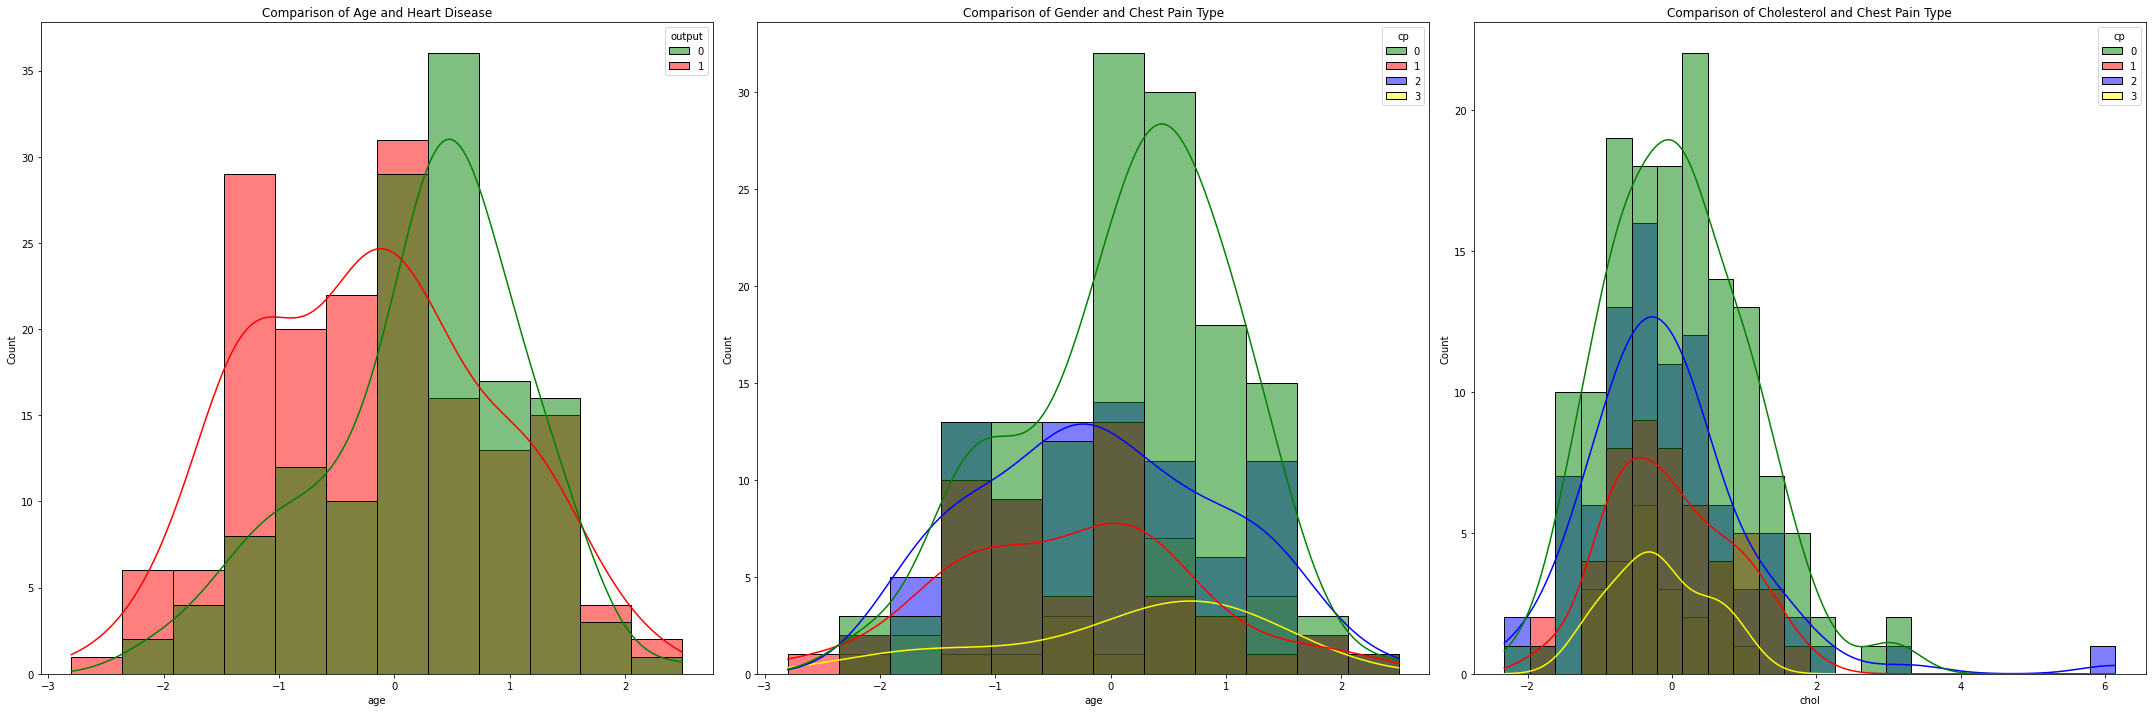

Chest Pain type : 
 Value 1: typical angina 
 Value 2: atypical angina 
 Value 3: non-anginal pain 
 Value 4: asymptomatic


In [19]:
# plt.figure(figsize=(10, 10))
# sns.displot(df, x="age", hue="output", palette=['green', 'red'], kde=True)
# # plt.show()

# # sns.countplot(x='sex', hue='cp', data=df)
# sns.displot(df, x="age", hue="cp", palette=['green', 'red', 'blue', 'yellow'], kde=True)
# plt.title('Comparison of Gender and Chest Pain Type')
# # plt.show()

# #cp and chol
# sns.displot(df, x="chol", hue="cp", palette=['green', 'red', 'blue', 'yellow'], kde=True)
# plt.title('Comparison of Cholesterol and Chest Pain Type')
# # plt.show()

# plt.tight_layout()
# plt.show()

# print("Chest Pain type : \n Value 1: typical angina \n Value 2: atypical angina \n Value 3: non-anginal pain \n Value 4: asymptomatic")

fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot 1
sns.histplot(df, x="age", hue="output", palette=['green', 'red'], kde=True, ax=axs[0])
axs[0].set_title('Comparison of Age and Heart Disease')

# Plot 2
sns.histplot(df, x="age", hue="cp", palette=['green', 'red', 'blue', 'yellow'], kde=True, ax=axs[1])
axs[1].set_title('Comparison of Gender and Chest Pain Type')

# Plot 3
sns.histplot(df, x="chol", hue="cp", palette=['green', 'red', 'blue', 'yellow'], kde=True, ax=axs[2])
axs[2].set_title('Comparison of Cholesterol and Chest Pain Type')

plt.tight_layout()
plt.show()

print("Chest Pain type : \n Value 1: typical angina \n Value 2: atypical angina \n Value 3: non-anginal pain \n Value 4: asymptomatic")

In [7]:
## scalling all features
scaler = StandardScaler()
df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']] = scaler.fit_transform(df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']])
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [16]:
from sklearn.metrics import accuracy_score

# Define predictors and target
X = df.drop('output', axis=1)
y = df['output']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

XGBoost Accuracy: 0.819672131147541
K-Nearest Neighbor Accuracy: 0.9016393442622951
Logistic Regression Accuracy: 0.8524590163934426
Gaussian Naive Bayes Accuracy: 0.8688524590163934
Bernoulli Naive Bayes Accuracy: 0.8688524590163934
Support Vector Machine Accuracy: 0.8688524590163934
Random Forest Accuracy: 0.819672131147541


In [9]:
# train the model using XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [10]:
#train the model using KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [11]:
#train the model using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
#train the model using Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [13]:
#train the model using Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [14]:
#train the model using Support Vector Machine
model = SVC()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [15]:
#train the model using Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Conclusion
Kesimpulan Singkat tentang Hasil dari 6 training Pemodelan:
Setelah mengevaluasi beberapa model klasifikasi, tampaknya K-Nearest Neighbor memiliki kinerja terbaik berdasarkan akurasi dan metrik relevan lainnya, dengan hasil akurasi yaitu Accuracy : 0.9016393442622951. Analisis kepentingan fitur dapat memberikan wawasan tentang faktor-faktor yang mempengaruhi prediksi peluang serangan jantung.